In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import datetime
import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
import os
#import xgboost as xgb
#import lightgbm as lgb
from functools import reduce
import warnings
from sklearn.metrics import mean_squared_error
from scipy import stats
from math import sqrt
from lightgbm import plot_tree
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from hyperopt import Trials
from hyperopt import fmin
from hyperopt import STATUS_OK
from hyperopt.pyll.stochastic import sample
import gc
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('dataset-0510/train.csv')
test  = pd.read_csv('dataset-0510/test.csv')


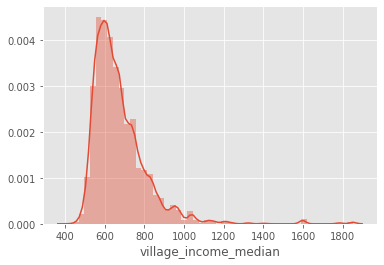

In [3]:
sns.distplot(train[train['village_income_median'].notna()]['village_income_median'])

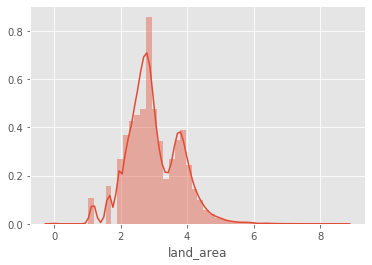

In [4]:
sns.distplot(np.log1p(train['land_area']))

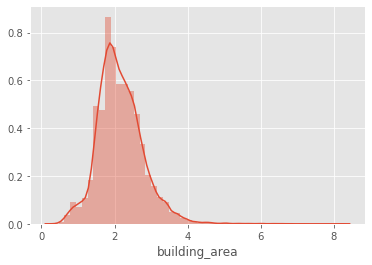

In [5]:
sns.distplot(np.log1p(train['building_area']))

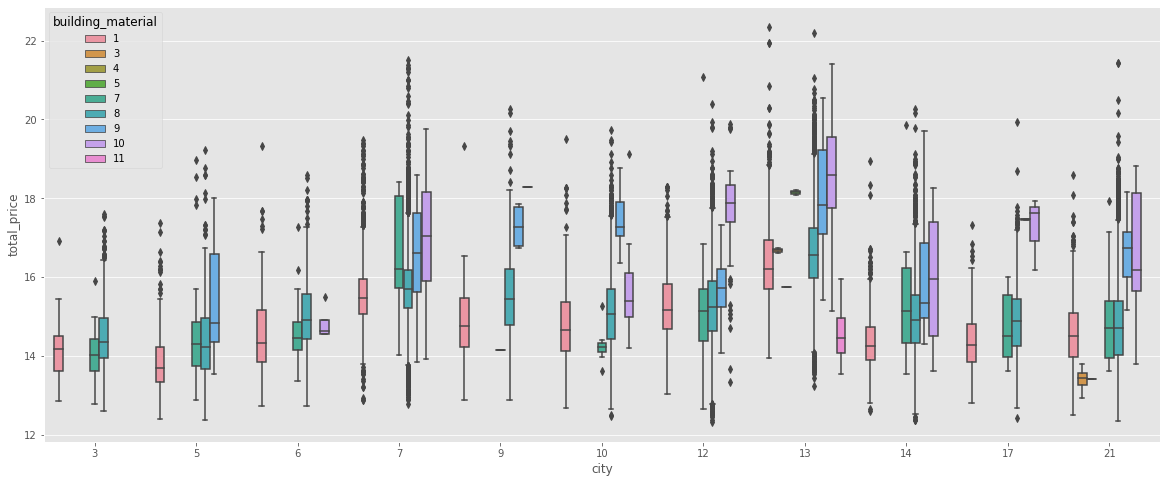

In [6]:
fig = plt.figure(figsize=(20,8))
sns.boxplot(x = train['city'], y = np.log1p(train['total_price']), hue = train['building_material'])

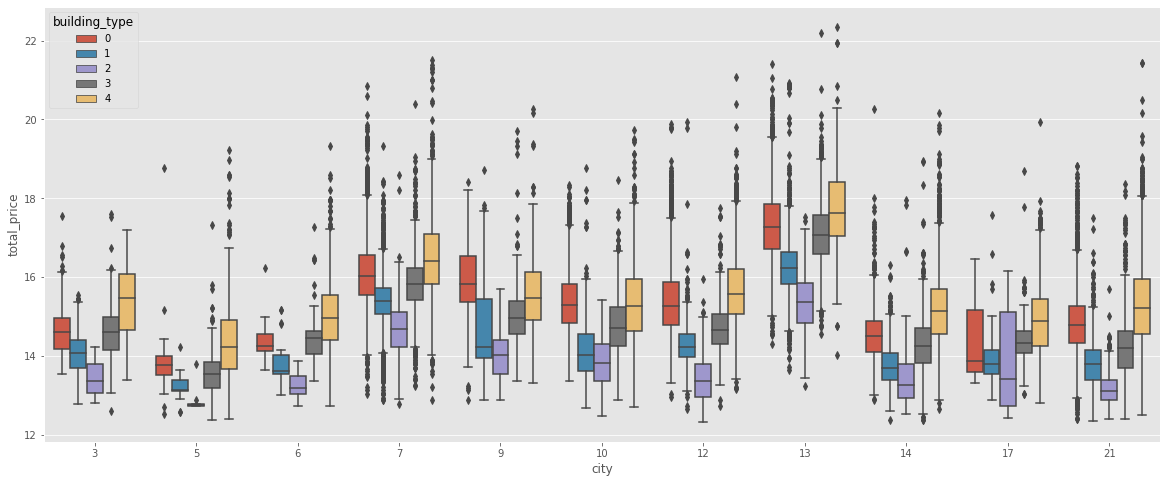

In [7]:
fig = plt.figure(figsize=(20,8))
sns.boxplot(x = train['city'], y = np.log1p(train['total_price']), hue = train['building_type'])

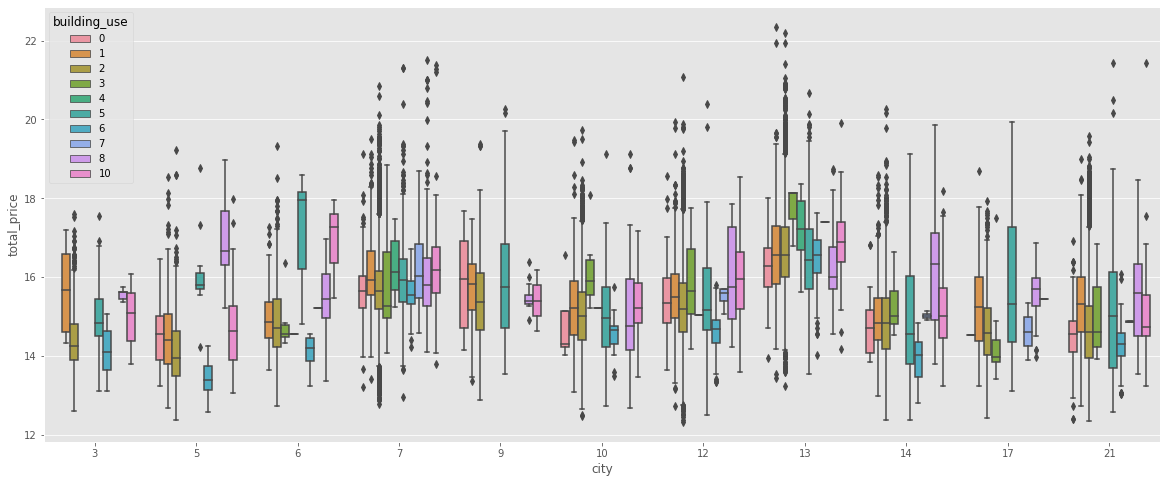

In [8]:
fig = plt.figure(figsize=(20,8))
sns.boxplot(x = train['city'], y = np.log1p(train['total_price']), hue = train['building_use'])

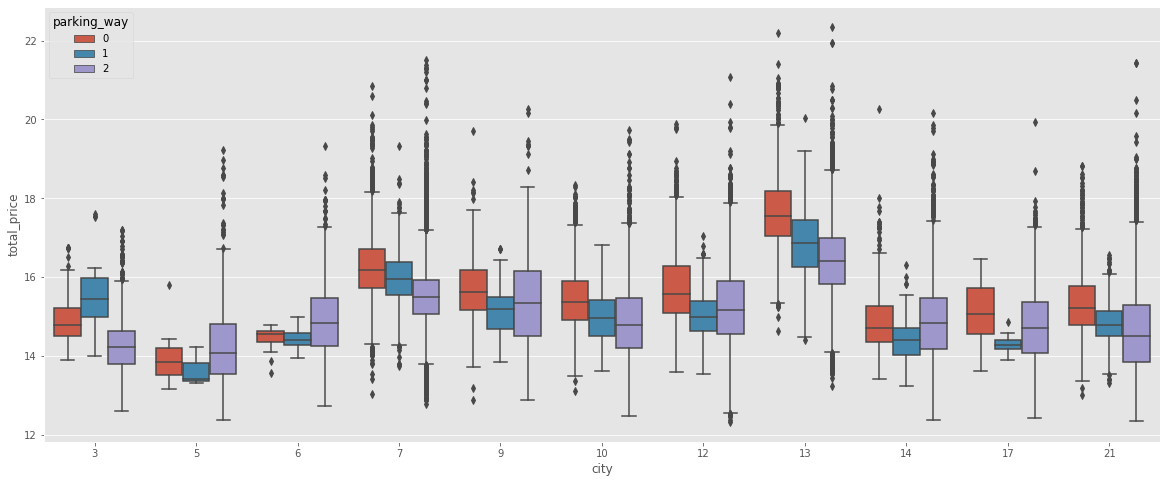

In [9]:
fig = plt.figure(figsize=(20,8))
sns.boxplot(x = train['city'], y = np.log1p(train['total_price']), hue = train['parking_way'])

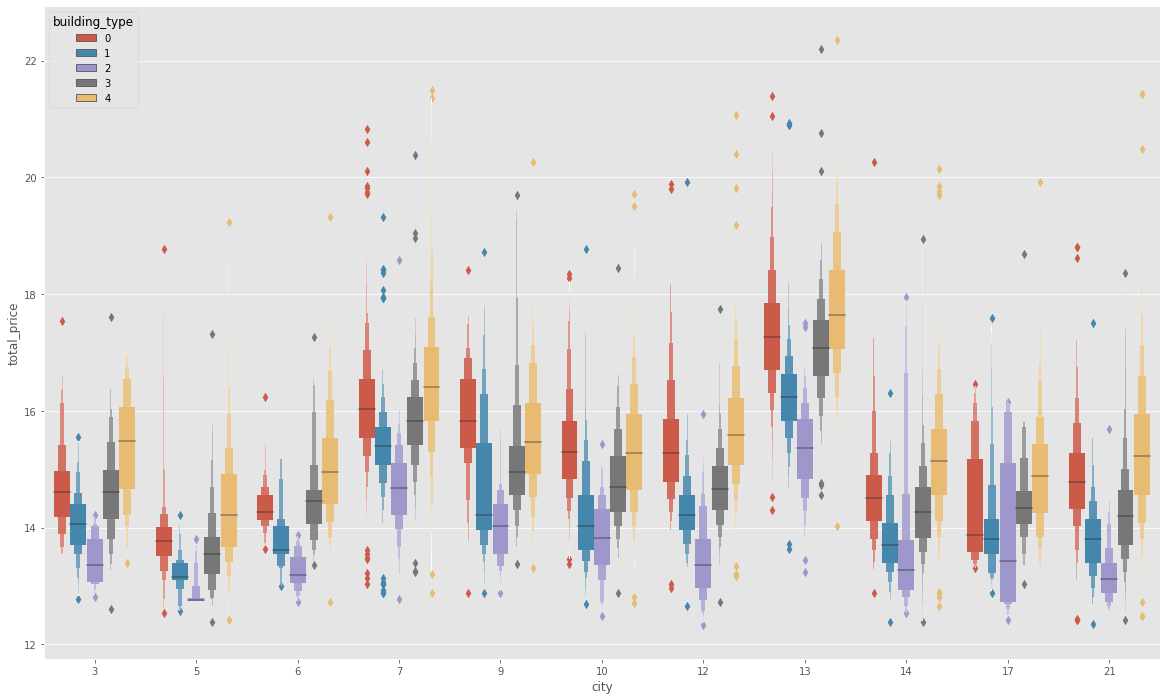

In [10]:
fig = plt.figure(figsize=(20,12))
sns.boxenplot(x = train['city'],y = np.log1p(train['total_price']), hue = train['building_type'])

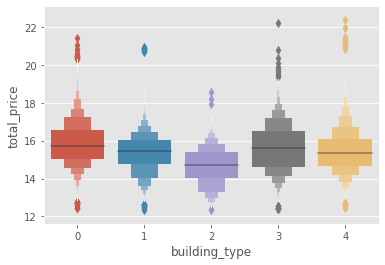

In [11]:
sns.boxenplot(train['building_type'], np.log1p(train['total_price']))

In [12]:
train['diff_dt'] = train['txn_dt'] - train['building_complete_dt']
#train['weekday'] = train['diff_dt'].apply(lambda x : x%7)

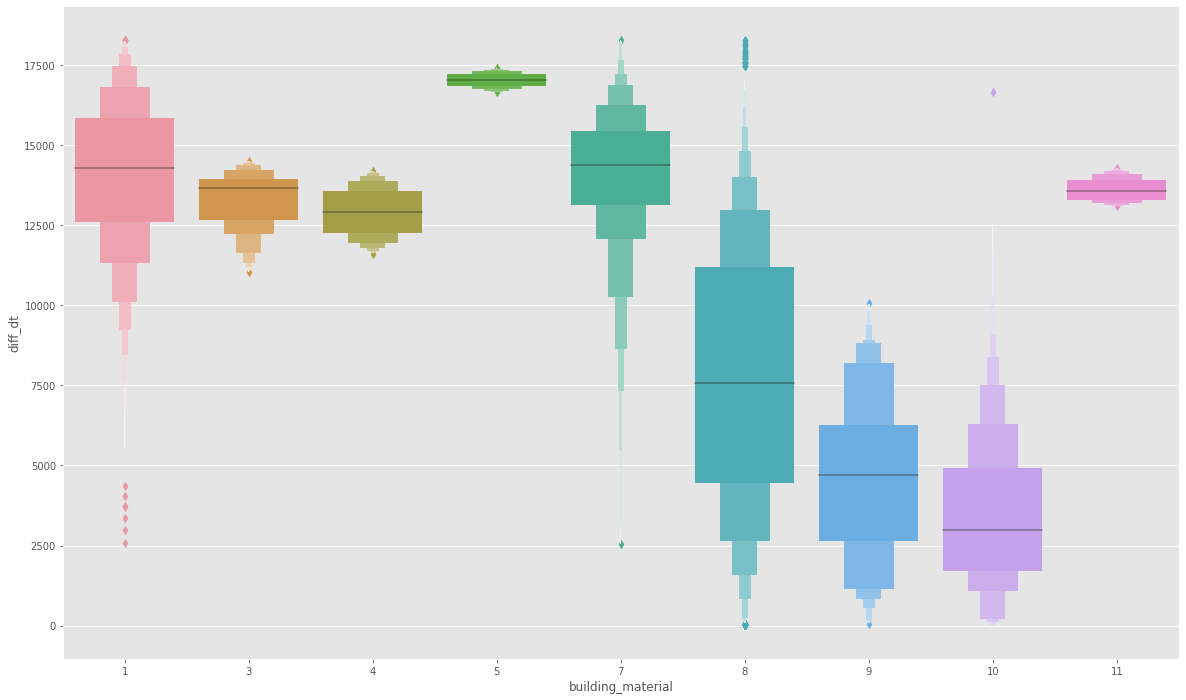

In [13]:
fig = plt.figure(figsize=(20,12))
sns.boxenplot(x = train['building_material'],y = train['diff_dt'])

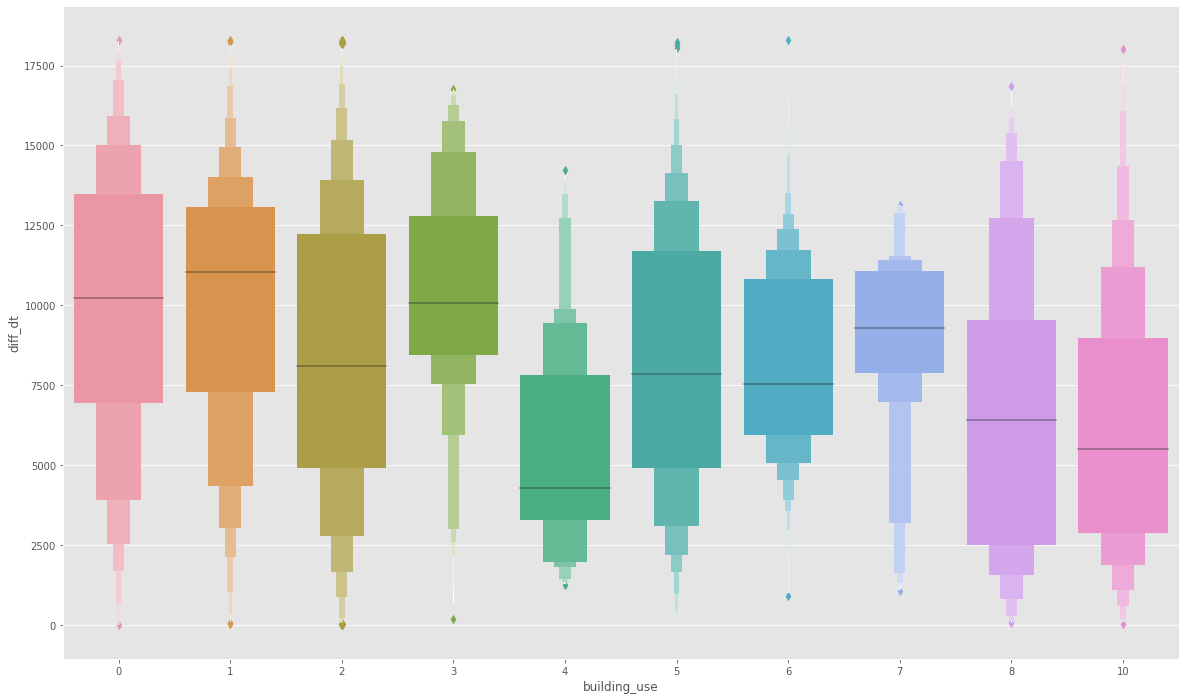

In [14]:
fig = plt.figure(figsize=(20,12))
sns.boxenplot(x = train['building_use'],y = train['diff_dt'])

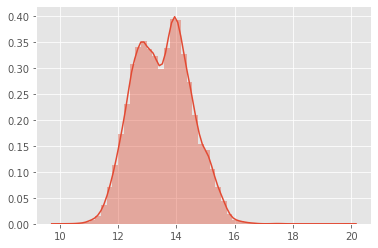

In [28]:
sns.distplot(np.log1p(train['total_price'] / train['building_area']))

In [35]:
train.drop(train[train.land_area == 0], axis=0)

KeyError: "['building_id' 'building_material' 'city' 'txn_dt' 'total_floor'\n 'building_type' 'building_use' 'building_complete_dt' 'parking_way'\n 'parking_area' 'parking_price' 'txn_floor' 'land_area' 'building_area'\n 'town' 'lat' 'lon' 'village_income_median' 'town_population' 'town_area'\n 'town_population_density' 'doc_rate' 'master_rate' 'bachelor_rate'\n 'jobschool_rate' 'highschool_rate' 'junior_rate' 'elementary_rate'\n 'born_rate' 'death_rate' 'marriage_rate' 'divorce_rate' 'village' 'N_50'\n 'N_500' 'N_1000' 'N_5000' 'N_10000' 'I_10' 'I_50' 'I_index_50' 'I_100'\n 'I_250' 'I_500' 'I_index_500' 'I_1000' 'I_index_1000' 'I_5000'\n 'I_index_5000' 'I_10000' 'I_index_10000' 'I_MIN' 'II_10' 'II_50'\n 'II_index_50' 'II_100' 'II_250' 'II_500' 'II_index_500' 'II_1000'\n 'II_index_1000' 'II_5000' 'II_index_5000' 'II_10000' 'II_index_10000'\n 'II_MIN' 'III_10' 'III_50' 'III_index_50' 'III_100' 'III_250' 'III_500'\n 'III_index_500' 'III_1000' 'III_index_1000' 'III_5000' 'III_index_5000'\n 'III_10000' 'III_index_10000' 'III_MIN' 'IV_10' 'IV_50' 'IV_index_50'\n 'IV_100' 'IV_250' 'IV_500' 'IV_index_500' 'IV_1000' 'IV_index_1000'\n 'IV_5000' 'IV_index_5000' 'IV_10000' 'IV_index_10000' 'IV_MIN' 'V_10'\n 'V_50' 'V_index_50' 'V_100' 'V_250' 'V_500' 'V_index_500' 'V_1000'\n 'V_index_1000' 'V_5000' 'V_index_5000' 'V_10000' 'V_index_10000' 'V_MIN'\n 'VI_10' 'VI_50' 'VI_index_50' 'VI_100' 'VI_250' 'VI_500' 'VI_index_500'\n 'VI_1000' 'VI_index_1000' 'VI_5000' 'VI_index_5000' 'VI_10000'\n 'VI_index_10000' 'VI_MIN' 'VII_10' 'VII_50' 'VII_index_50' 'VII_100'\n 'VII_250' 'VII_500' 'VII_index_500' 'VII_1000' 'VII_index_1000'\n 'VII_5000' 'VII_index_5000' 'VII_10000' 'VII_index_10000' 'VII_MIN'\n 'VIII_10' 'VIII_50' 'VIII_index_50' 'VIII_100' 'VIII_250' 'VIII_500'\n 'VIII_index_500' 'VIII_1000' 'VIII_index_1000' 'VIII_5000'\n 'VIII_index_5000' 'VIII_10000' 'VIII_index_10000' 'VIII_MIN' 'IX_10'\n 'IX_50' 'IX_index_50' 'IX_100' 'IX_250' 'IX_500' 'IX_index_500' 'IX_1000'\n 'IX_index_1000' 'IX_5000' 'IX_index_5000' 'IX_10000' 'IX_index_10000'\n 'IX_MIN' 'X_10' 'X_50' 'X_index_50' 'X_100' 'X_250' 'X_500' 'X_index_500'\n 'X_1000' 'X_index_1000' 'X_5000' 'X_index_5000' 'X_10000' 'X_index_10000'\n 'X_MIN' 'XI_10' 'XI_50' 'XI_index_50' 'XI_100' 'XI_250' 'XI_500'\n 'XI_index_500' 'XI_1000' 'XI_index_1000' 'XI_5000' 'XI_index_5000'\n 'XI_10000' 'XI_index_10000' 'XI_MIN' 'XII_10' 'XII_50' 'XII_index_50'\n 'XII_100' 'XII_250' 'XII_500' 'XII_index_500' 'XII_1000' 'XII_index_1000'\n 'XII_5000' 'XII_index_5000' 'XII_10000' 'XII_index_10000' 'XII_MIN'\n 'XIII_10' 'XIII_50' 'XIII_index_50' 'XIII_100' 'XIII_250' 'XIII_500'\n 'XIII_index_500' 'XIII_1000' 'XIII_index_1000' 'XIII_5000'\n 'XIII_index_5000' 'XIII_10000' 'XIII_index_10000' 'XIII_MIN' 'XIV_10'\n 'XIV_50' 'XIV_index_50' 'XIV_100' 'XIV_250' 'XIV_500' 'XIV_index_500'\n 'XIV_1000' 'XIV_index_1000' 'XIV_5000' 'XIV_index_5000' 'XIV_10000'\n 'XIV_index_10000' 'XIV_MIN' 'total_price' 'diff_dt'] not found in axis"

OverflowError: cannot convert float infinity to integer

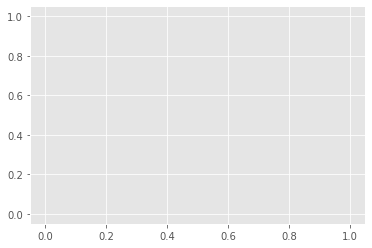

In [29]:
sns.distplot(np.log1p(train.loc[train['total_price']] / train['land_area']))